In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [72]:
df=pd.read_csv(r"C:\Users\USER\Downloads\WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [73]:
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [74]:
df.info()
#here totalcharges is a object data type but it's actually a numerice data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [75]:
df.describe()


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [76]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [77]:
df['Churn'].value_counts()/len(df)*100

Churn
No     73.463013
Yes    26.536987
Name: count, dtype: float64

Text(0.5, 1.0, 'Count of Target Variable per category')

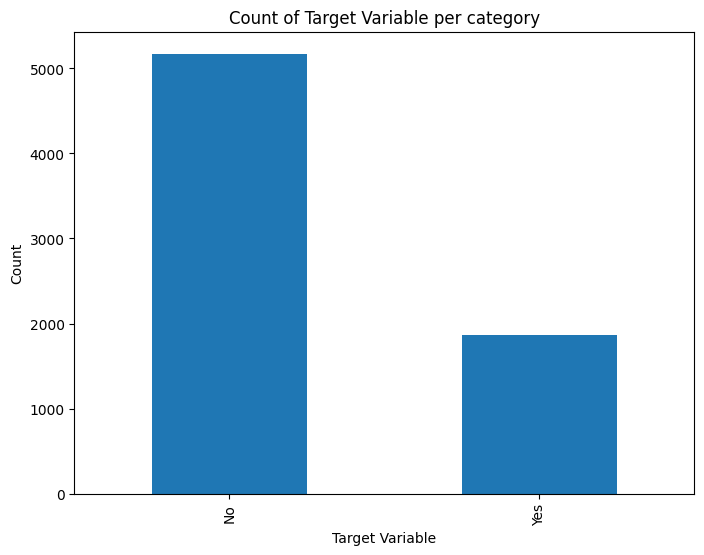

In [78]:
df['Churn'].value_counts().plot(kind="bar",figsize=(8,6))
plt.xlabel("Target Variable")
plt.ylabel("Count")
plt.title("Count of Target Variable per category")
#here the data set is imbalanced

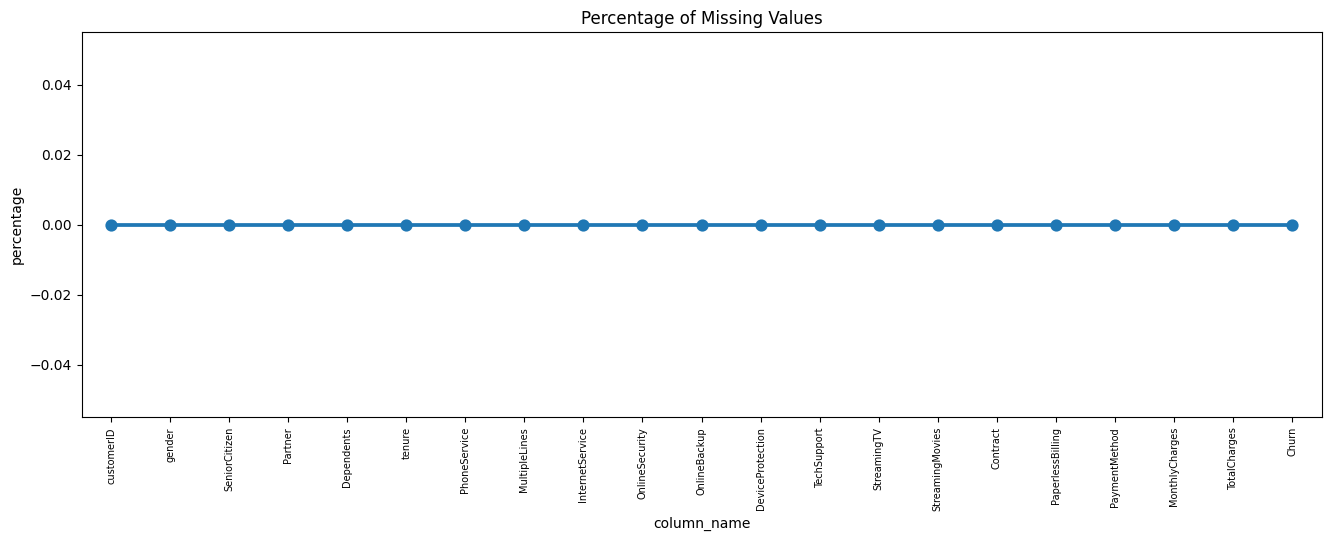

In [79]:
missing=pd.DataFrame((df.isnull().sum())*100/df.shape[0]).reset_index()
missing.columns=['column_name','percentage']
plt.figure(figsize=(16,5))
ax=sns.pointplot(x='column_name', y='percentage',data=missing)
plt.xticks(rotation =90,fontsize=7)
plt.title("Percentage of Missing Values")
plt.ylabel("percentage")
plt.show()
#Here we dont have any missing data

In [80]:
#create copy of the data
new_df=df.copy()

In [81]:
new_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [82]:
#convert TotalCharges into numeric
new_df.TotalCharges=pd.to_numeric(new_df.TotalCharges,errors='coerce')
new_df.info()
#here there are missing values in TotalCharges  and its very less so we are going to delete the rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [83]:
new_df.loc[new_df['TotalCharges'].isnull()==True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [84]:
#we are deleting these rows because these are vary low missing values are there
new_df.dropna(how='any',inplace=True)

In [85]:
new_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [86]:
#convert the Tenure columns into bins.so it will be simple analyze the data and if there are any continous data are inthe data (AGE,SCORE..)try convert to into bins
print(new_df['tenure'].max())

72


In [87]:
bins=[1,13,25,37,49,61,73]
lables=['1-12','13-24','25-36','37-48','49-60','61-72']
new_df['tenure_group']=pd.cut(df['tenure'],bins=bins,labels=lables,right=False)

In [88]:
new_df['tenure_group'].value_counts()

tenure_group
1-12     2175
61-72    1407
13-24    1024
25-36     832
49-60     832
37-48     762
Name: count, dtype: int64

In [89]:
#remoning unwanted columns
new_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1-12
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25-36
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1-12
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37-48
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1-12


In [90]:
new_df.drop(columns=['customerID','tenure'],axis=1,inplace=True)

In [91]:
new_df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1-12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25-36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1-12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37-48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1-12


In [94]:
#Univariate Analysis-its always  do onthe categorical data
#option-1
categorical_cols = ['gender','SeniorCitizen','Partner','Dependents','PhoneService',
                    'MultipleLines','InternetService','OnlineSecurity','OnlineBackup',
                    'DeviceProtection','TechSupport','StreamingTV','StreamingMovies',
                    'Contract','PaperlessBilling','PaymentMethod','Churn']

numerical_cols = ['MonthlyCharges','TotalCharges']  # numeric


In [95]:
for col in categorical_cols:
    print(f"--- {col} ---")
    counts = df[col].value_counts()
    percentages = df[col].value_counts(normalize=True) * 100
    summary = pd.DataFrame({'Count': counts, 'Percentage': percentages})
    print(summary, "\n")


--- gender ---
        Count  Percentage
gender                   
Male     3555    50.47565
Female   3488    49.52435 

--- SeniorCitizen ---
               Count  Percentage
SeniorCitizen                   
0               5901   83.785319
1               1142   16.214681 

--- Partner ---
         Count  Percentage
Partner                   
No        3641    51.69672
Yes       3402    48.30328 

--- Dependents ---
            Count  Percentage
Dependents                   
No           4933   70.041176
Yes          2110   29.958824 

--- PhoneService ---
              Count  Percentage
PhoneService                   
Yes            6361   90.316626
No              682    9.683374 

--- MultipleLines ---
                  Count  Percentage
MultipleLines                      
No                 3390   48.132898
Yes                2971   42.183729
No phone service    682    9.683374 

--- InternetService ---
                 Count  Percentage
InternetService                   
Fiber o

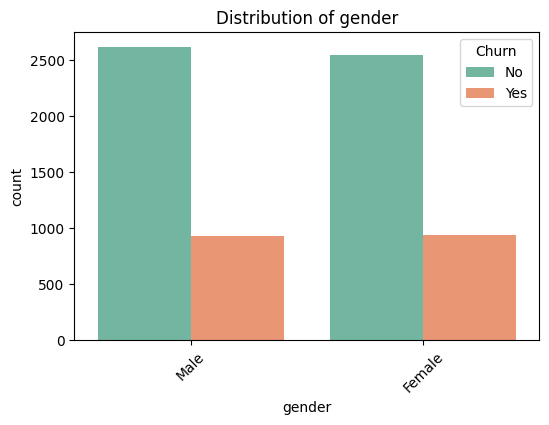

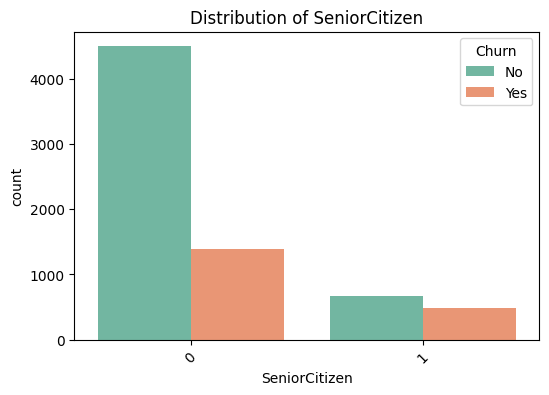

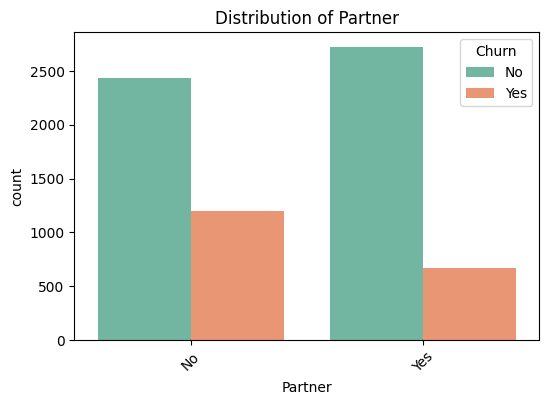

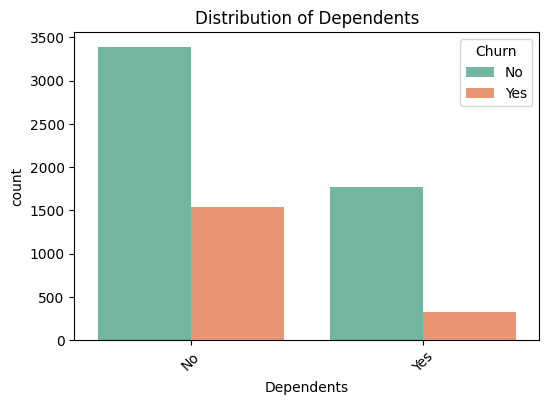

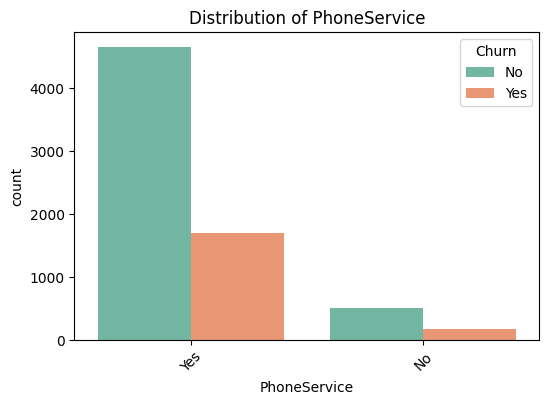

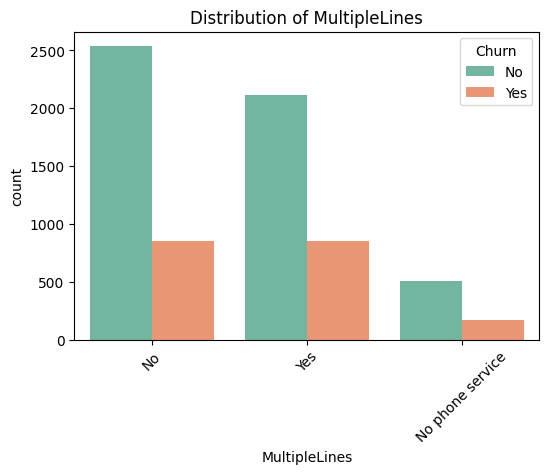

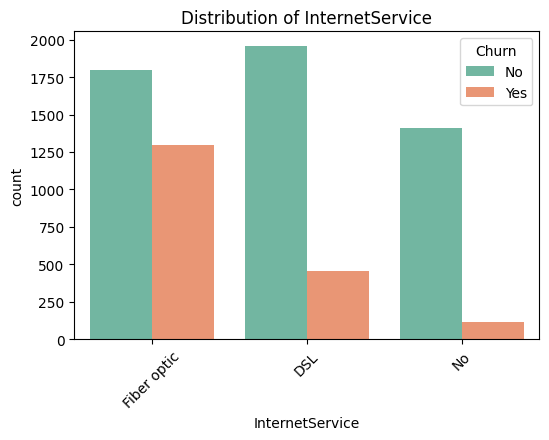

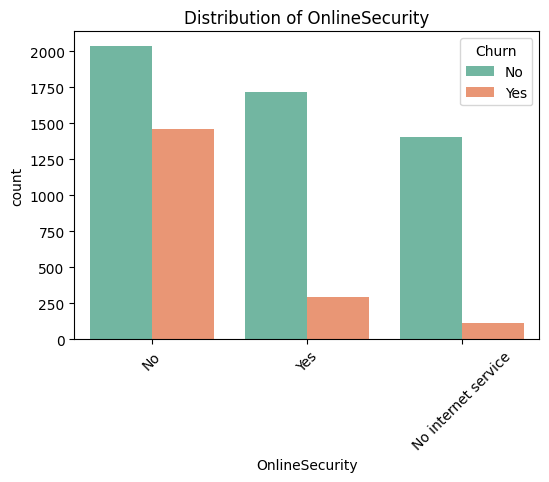

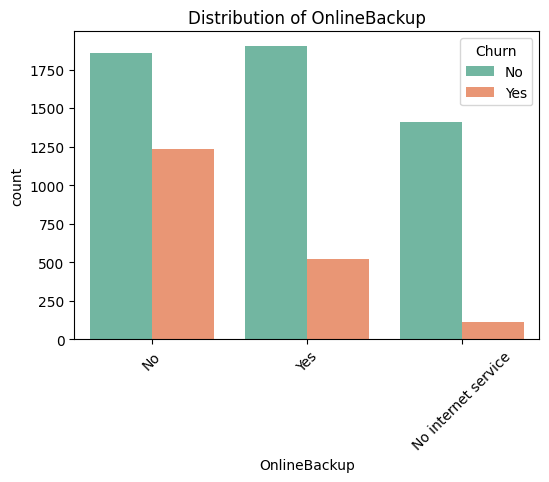

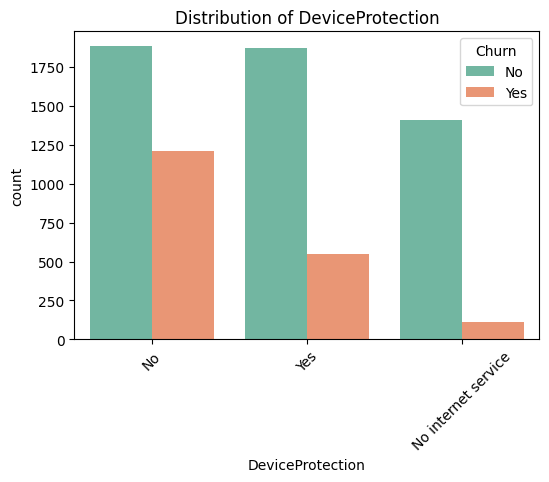

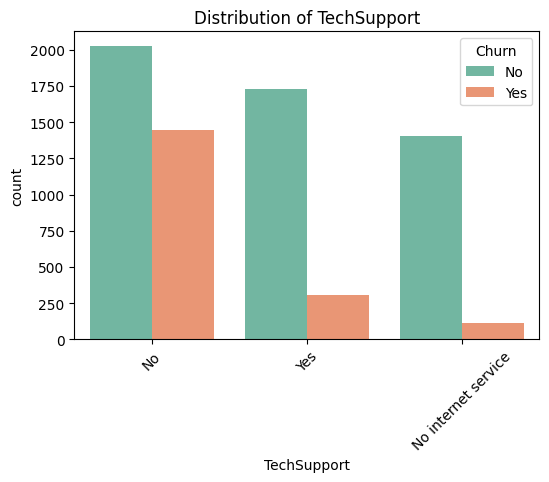

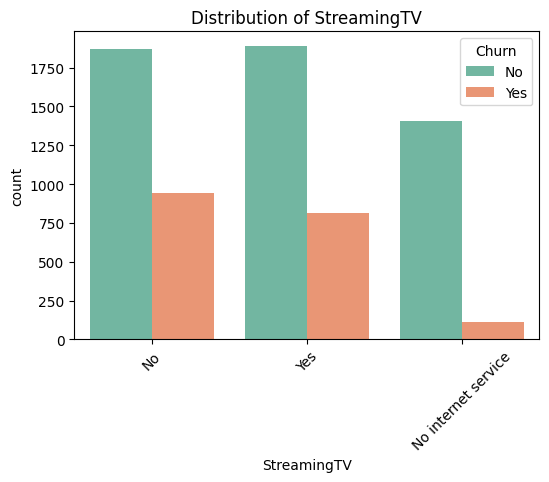

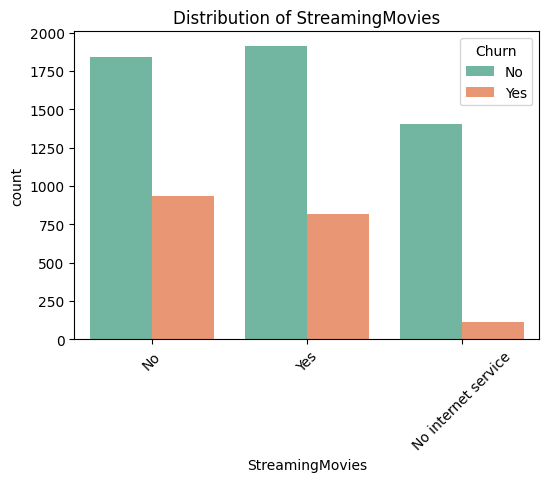

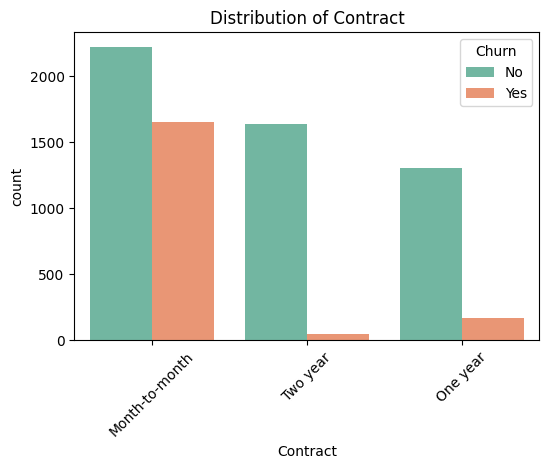

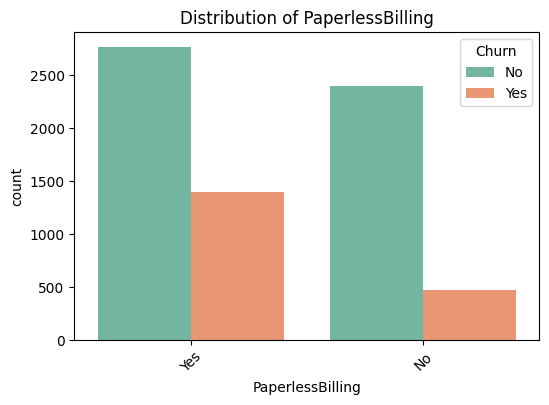

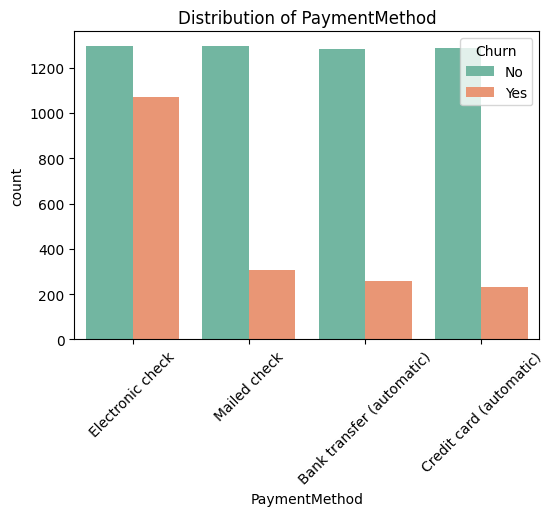

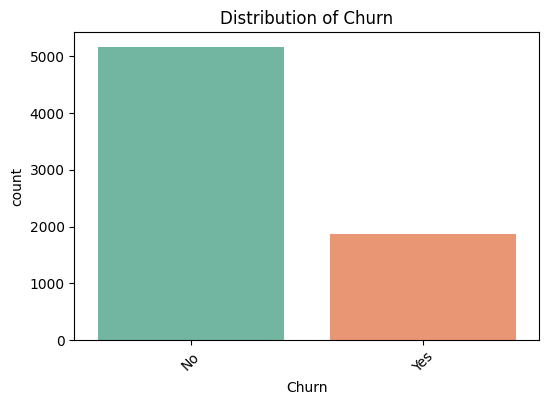

In [96]:
for col in categorical_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, data=new_df, order=df[col].value_counts().index, palette="Set2",hue='Churn')
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.show()


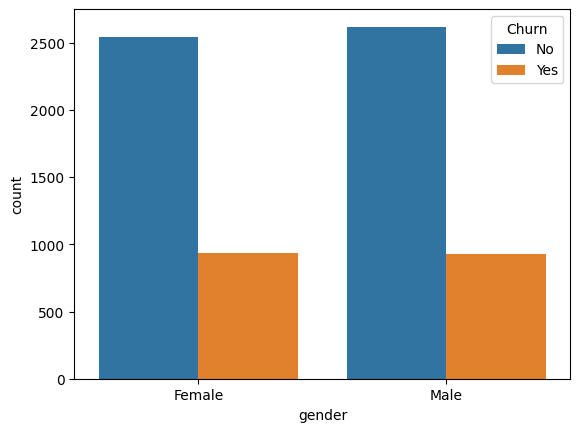

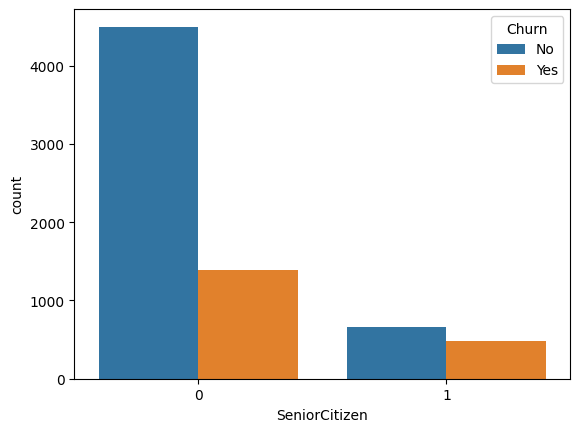

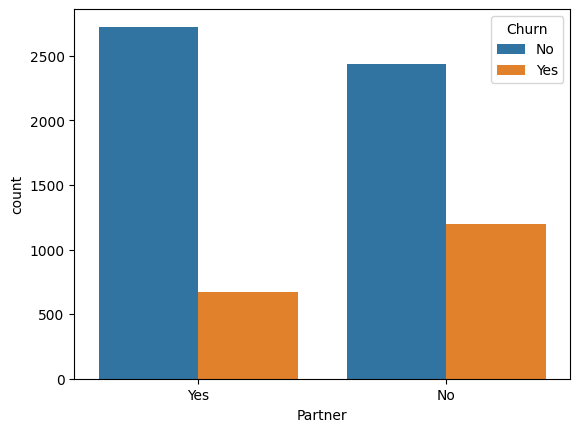

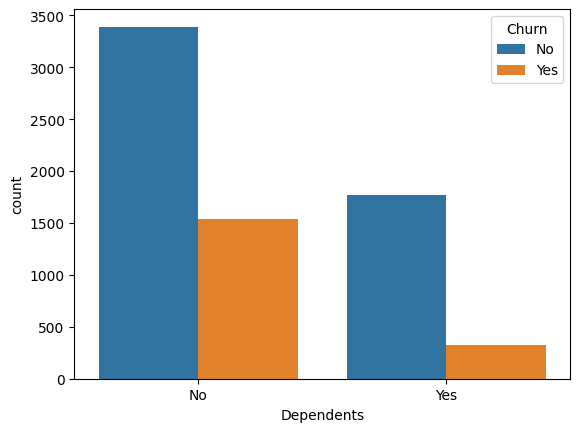

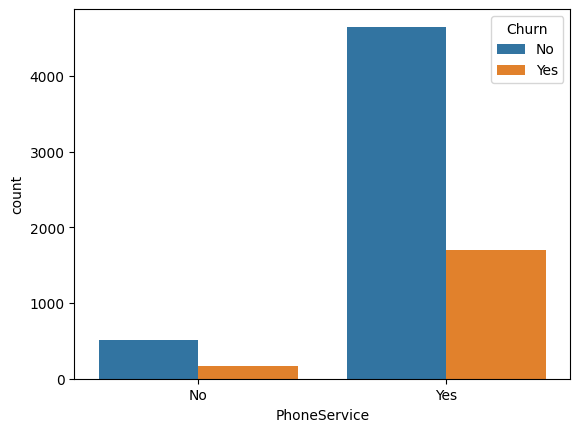

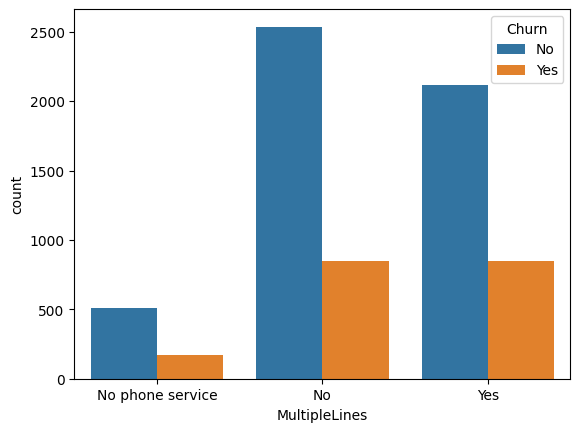

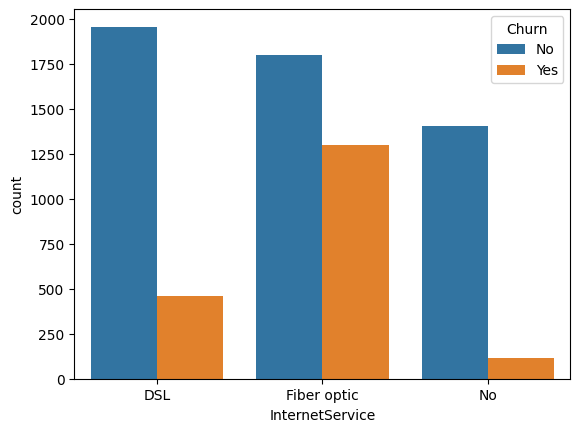

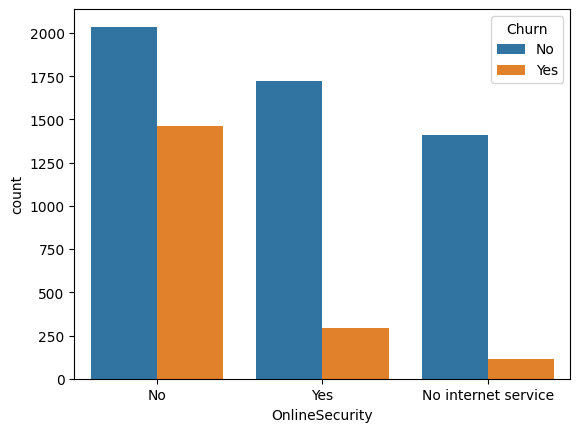

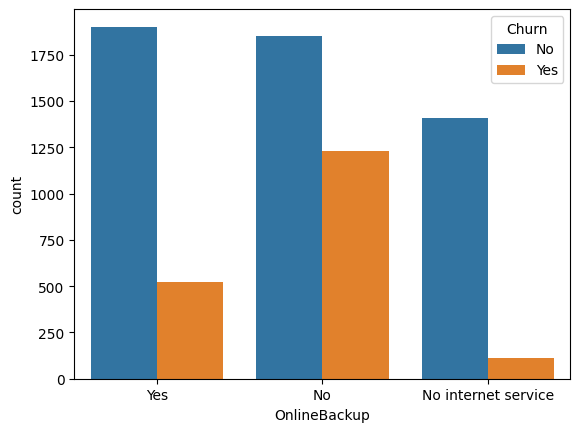

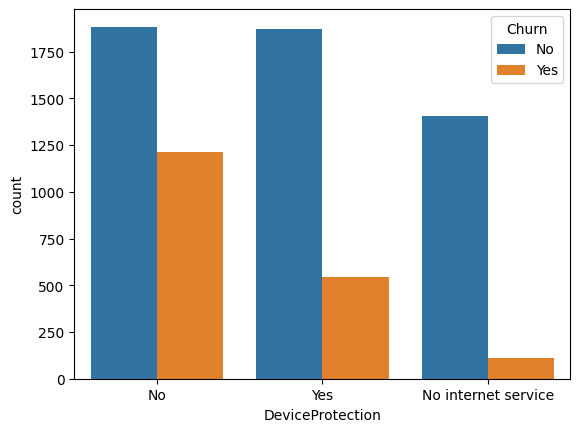

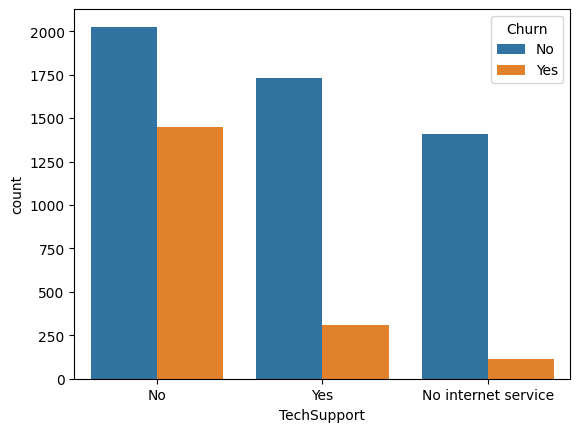

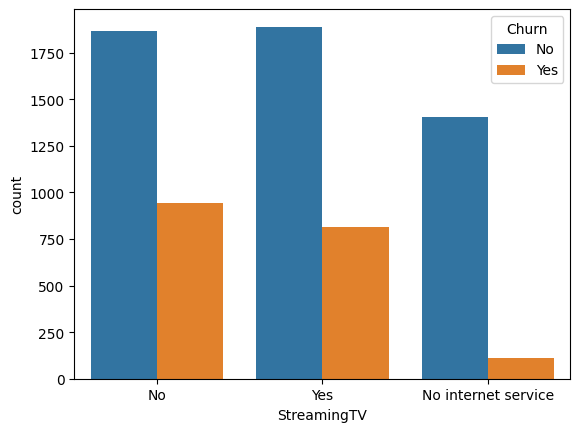

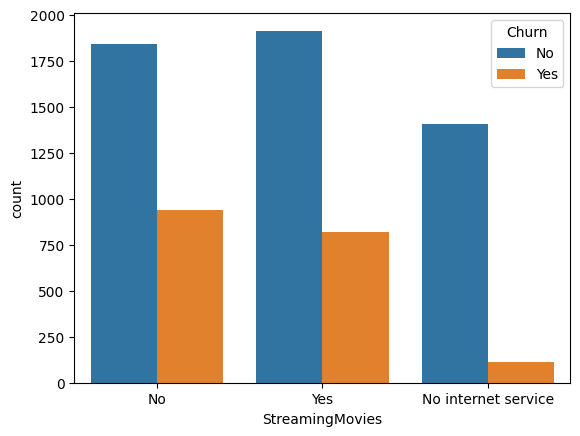

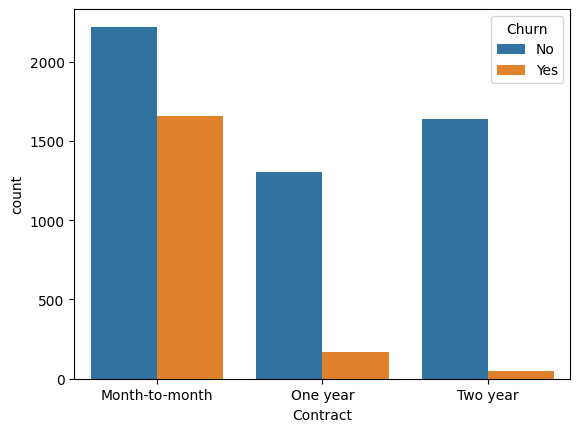

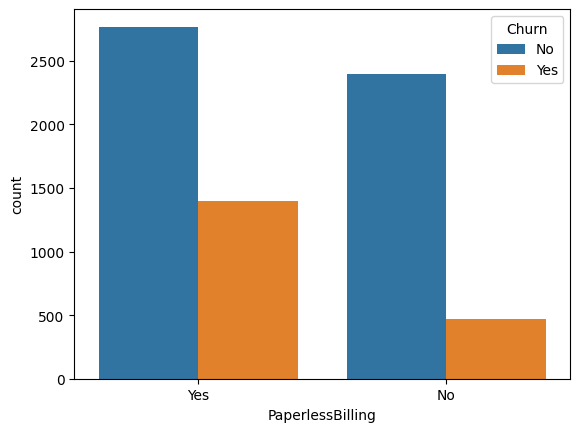

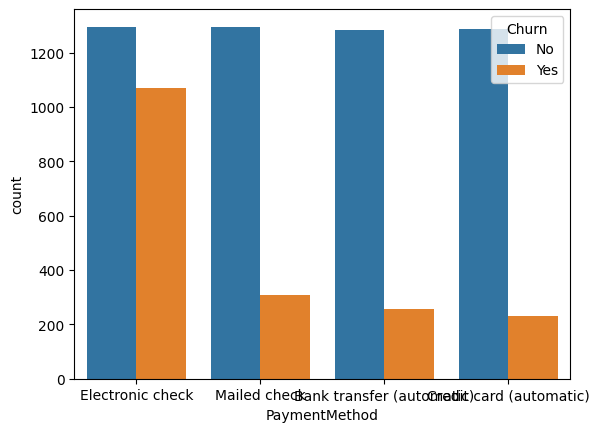

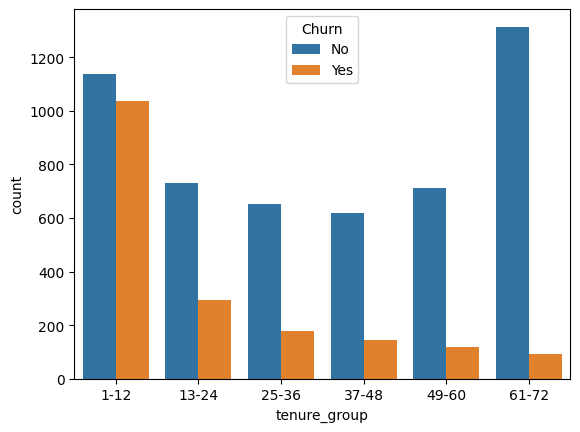

In [97]:
#option-2
for i,predictor in enumerate(new_df.drop(columns=['Churn','TotalCharges','MonthlyCharges'])):
    plt.figure(i)
    sns.countplot(data=new_df,x=predictor,hue='Churn')

In [98]:
new_df.gender.value_counts()

gender
Male      3549
Female    3483
Name: count, dtype: int64

In [99]:
new_df1_target0=new_df[new_df["Churn"]=="No"]
new_df1_target1=new_df[new_df["Churn"]=='Yes']


In [100]:
new_df1_target1.gender.value_counts()

gender
Female    939
Male      930
Name: count, dtype: int64

In [101]:
pd.crosstab(new_df.PaymentMethod,new_df.Churn)

Churn,No,Yes
PaymentMethod,,
Bank transfer (automatic),1284,258
Credit card (automatic),1289,232
Electronic check,1294,1071
Mailed check,1296,308


In [102]:
#convert the chunrn into binary numerice variable yes=1,no=2
new_df['churn']=np.where(new_df.Churn == 'Yes',1,0)

In [103]:
new_df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group,churn
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1-12,0
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,...,No,No,One year,No,Mailed check,56.95,1889.50,No,25-36,0
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1-12,1
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37-48,0
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1-12,1


In [104]:
#convert all the categorical varible into dummy variable

new_df_dummies=pd.get_dummies(new_df,drop_first=False)
new_df_dummies=new_df_dummies.astype(int)
new_df_dummies.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes,tenure_group_1-12,tenure_group_13-24,tenure_group_25-36,tenure_group_37-48,tenure_group_49-60,tenure_group_61-72
0,0,29,29,0,1,0,0,1,1,0,...,1,0,1,0,1,0,0,0,0,0
1,0,56,1889,0,0,1,1,0,1,0,...,0,1,1,0,0,0,1,0,0,0
2,0,53,108,1,0,1,1,0,1,0,...,0,1,0,1,1,0,0,0,0,0
3,0,42,1840,0,0,1,1,0,1,0,...,0,0,1,0,0,0,0,1,0,0
4,0,70,151,1,1,0,1,0,1,0,...,1,0,0,1,1,0,0,0,0,0


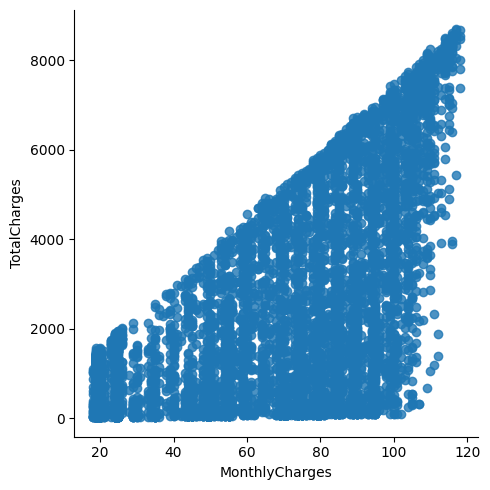

In [105]:
#relationship between monthlycharges and total charges
sns.lmplot(data=new_df_dummies,x='MonthlyCharges',y='TotalCharges',fit_reg=False)

In [106]:
new_df_dummies['MonthlyCharges'].corr(new_df_dummies['TotalCharges'])

np.float64(0.6511252380434775)

Text(0, 0.5, 'Monthly Charges by churn')

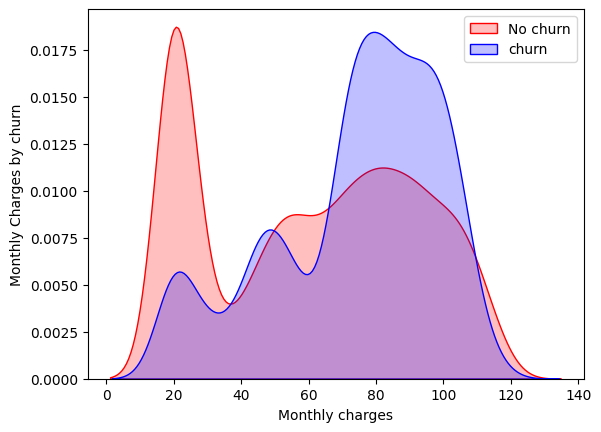

In [107]:
#churn by monhtly charges and total charges
mth=sns.kdeplot(new_df_dummies.MonthlyCharges[(new_df_dummies["churn"]==0)],color="Red",fill=True)
mth=sns.kdeplot(new_df_dummies.MonthlyCharges[(new_df_dummies["churn"]==1)],color="Blue",fill=True)
mth.legend(["No churn","churn"],loc='upper right')
mth.set_xlabel("Monthly charges")
mth.set_ylabel("Monthly Charges by churn")
#churn is more ar the high monthly charges

Text(0, 0.5, 'Total Charges by churn')

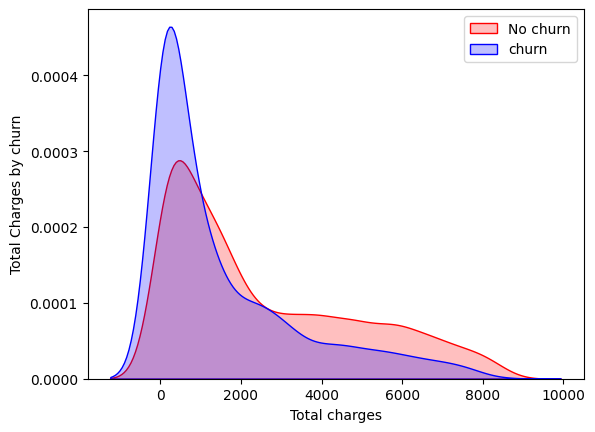

In [108]:
#Total charges and total charges
mth=sns.kdeplot(new_df_dummies.TotalCharges[(new_df_dummies["churn"]==0)],color="Red",fill=True)
mth=sns.kdeplot(new_df_dummies.TotalCharges[(new_df_dummies["churn"]==1)],color="Blue",fill=True)
mth.legend(["No churn","churn"],loc='upper right')
mth.set_xlabel("Total charges")
mth.set_ylabel("Total Charges by churn")
#churn  is high at low total charges 

<Axes: >

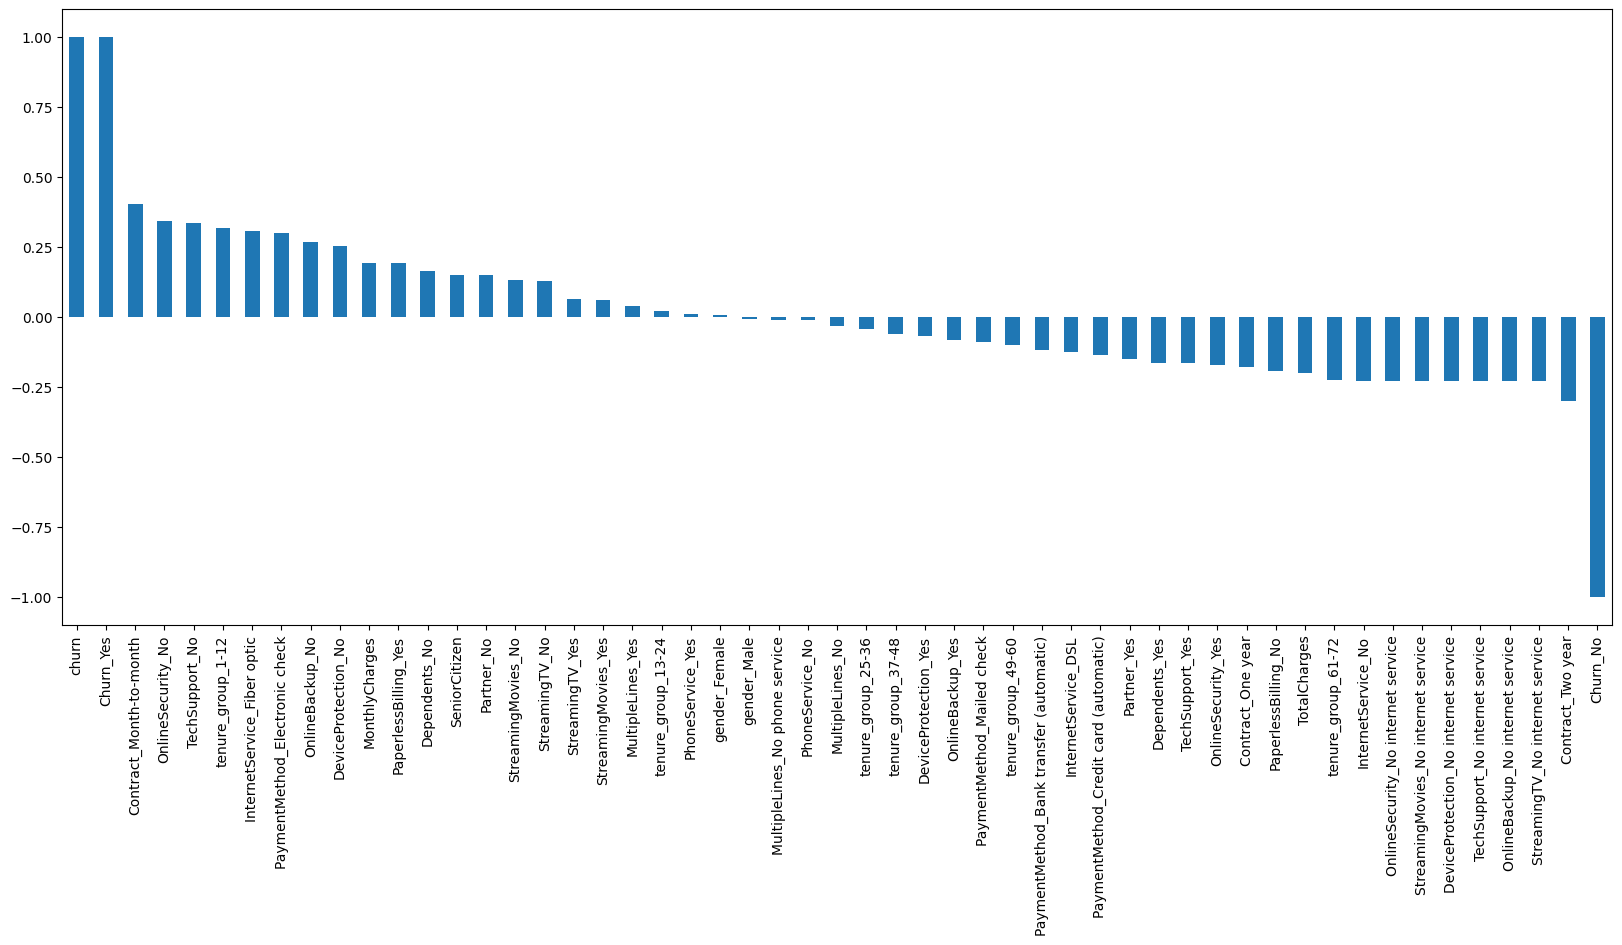

In [109]:
#build a corelation of all data to churn

plt.figure(figsize=(20,8))
new_df_dummies.corr()['Churn_Yes'].sort_values(ascending=False).plot(kind='bar')

In [110]:
new_df_dummies.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes,tenure_group_1-12,tenure_group_13-24,tenure_group_25-36,tenure_group_37-48,tenure_group_49-60,tenure_group_61-72
0,0,29,29,0,1,0,0,1,1,0,...,1,0,1,0,1,0,0,0,0,0
1,0,56,1889,0,0,1,1,0,1,0,...,0,1,1,0,0,0,1,0,0,0
2,0,53,108,1,0,1,1,0,1,0,...,0,1,0,1,1,0,0,0,0,0
3,0,42,1840,0,0,1,1,0,1,0,...,0,0,1,0,0,0,0,1,0,0
4,0,70,151,1,1,0,1,0,1,0,...,1,0,0,1,1,0,0,0,0,0


<Axes: >

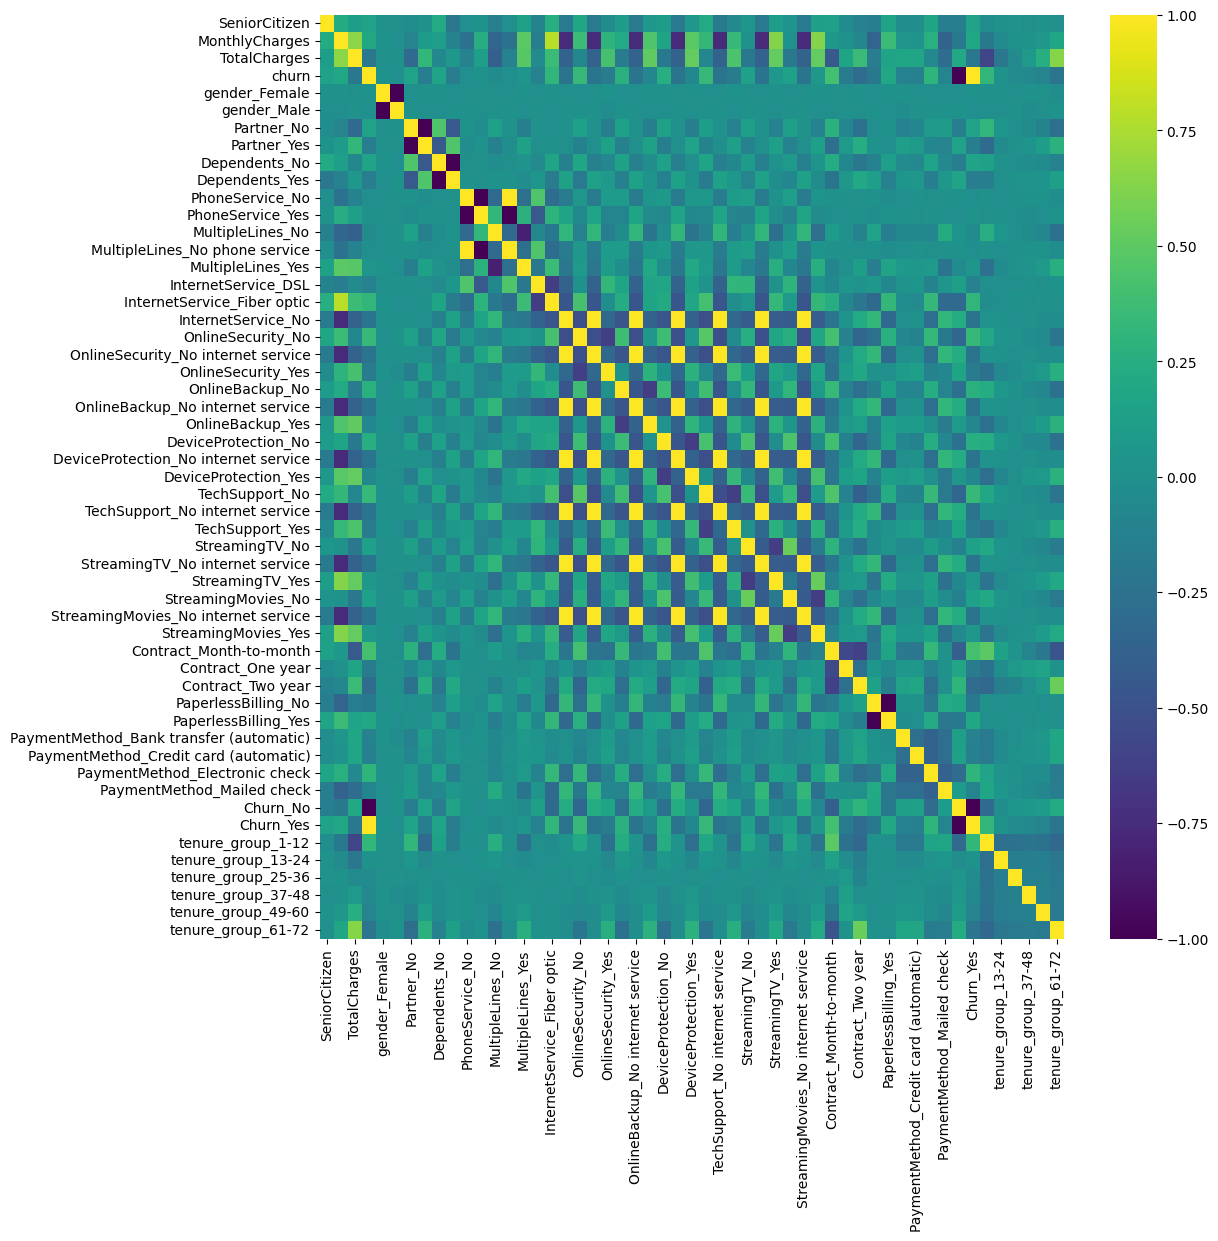

In [111]:
plt.figure(figsize=(12,12))
sns.heatmap(new_df_dummies.corr(),cmap='viridis')

In [112]:
new_df1_target0=new_df.loc[new_df["churn"]==0]
new_df1_target1=new_df.loc[new_df["churn"]==1]

In [113]:
len(new_df1_target0)

5163

In [114]:
len(new_df1_target1)

1869

In [137]:
def uniplot(df, col, titlei, hue='churn'):
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams["axes.titlesize"] = 22
    plt.rcParams["axes.titlepad"] = 30

    # Adjust width based on categories and hue
    if hue:
        width = len(df[col].unique()) + 4 * len(df[hue].unique())
    else:
        width = len(df[col].unique()) + 7

    fig, ax = plt.subplots(figsize=(width, 8))
    plt.xticks(rotation=45) # Optional — use only if count range is large
    plt.title(title)
    
    sns.countplot(data=df, x=col, order=df[col].value_counts().index, hue=hue, palette='bright', ax=ax)
    plt.show()

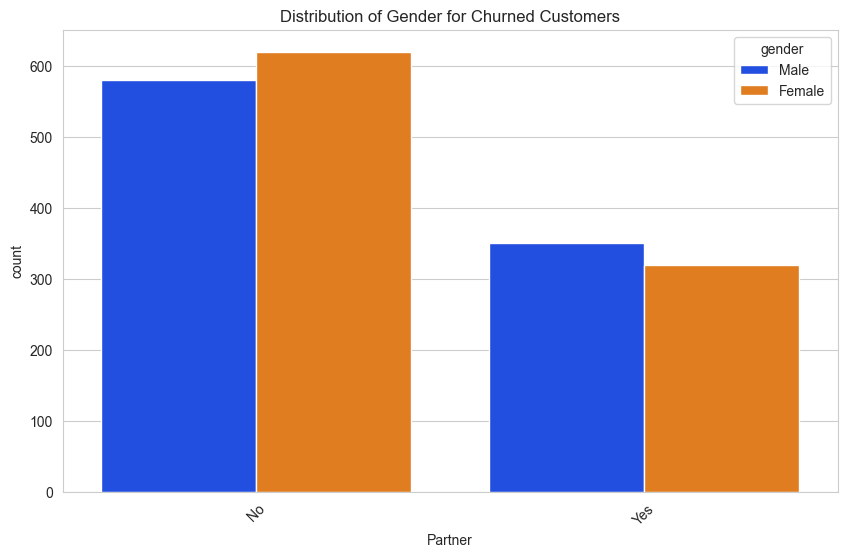

In [139]:
uniplot(new_df1_target1, 'Partner', 'Distribution of Gender for Churned Customers', 'gender')


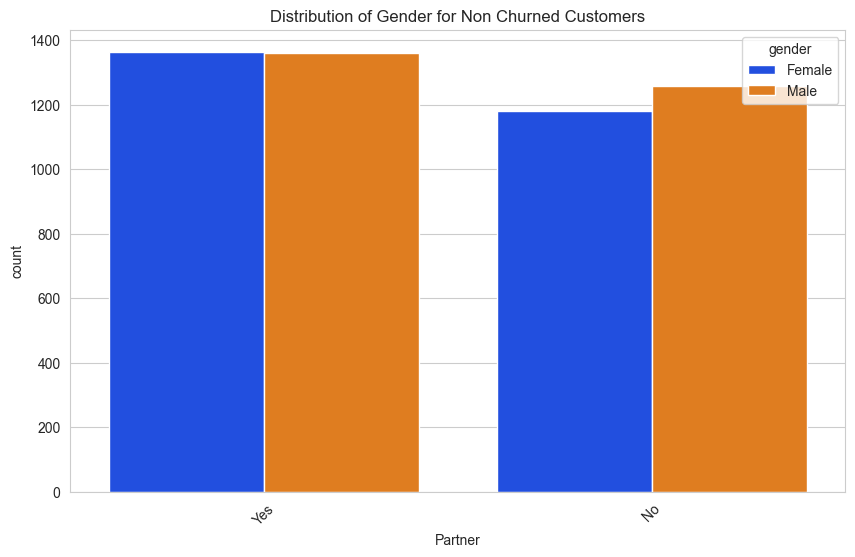

In [140]:
uniplot(new_df1_target0,col='Partner',title='Distribution of Gender for Non Churned Customers',hue='gender')

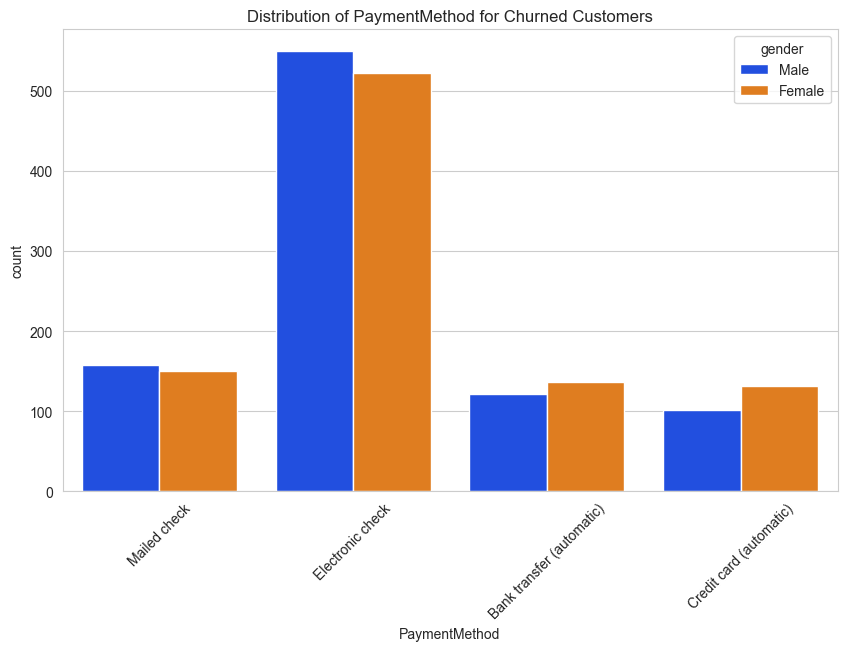

In [141]:
uniplot(new_df1_target1,col='PaymentMethod',title='Distribution of PaymentMethod for Churned Customers',hue='gender')

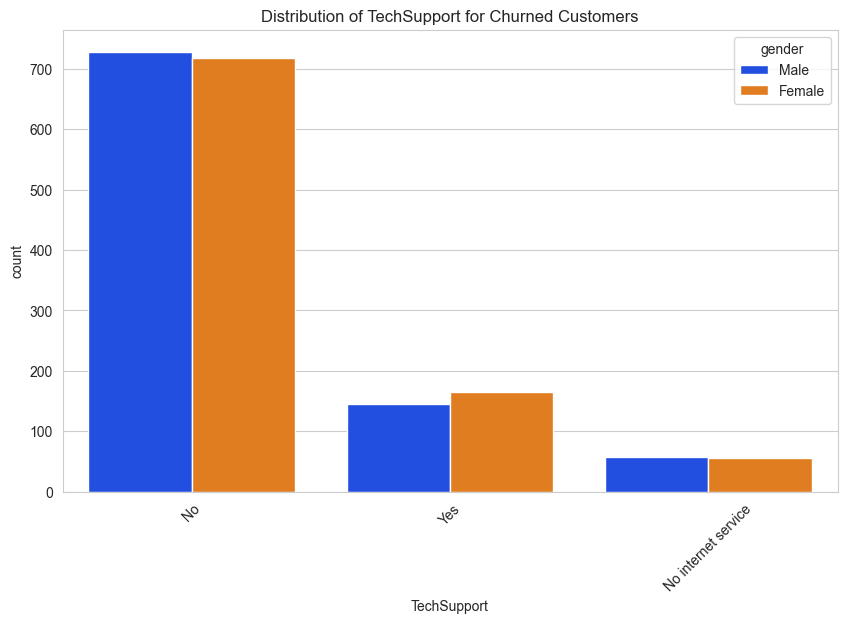

In [143]:
uniplot(new_df1_target1,col='TechSupport',title='Distribution of TechSupport for Churned Customers',hue='gender')

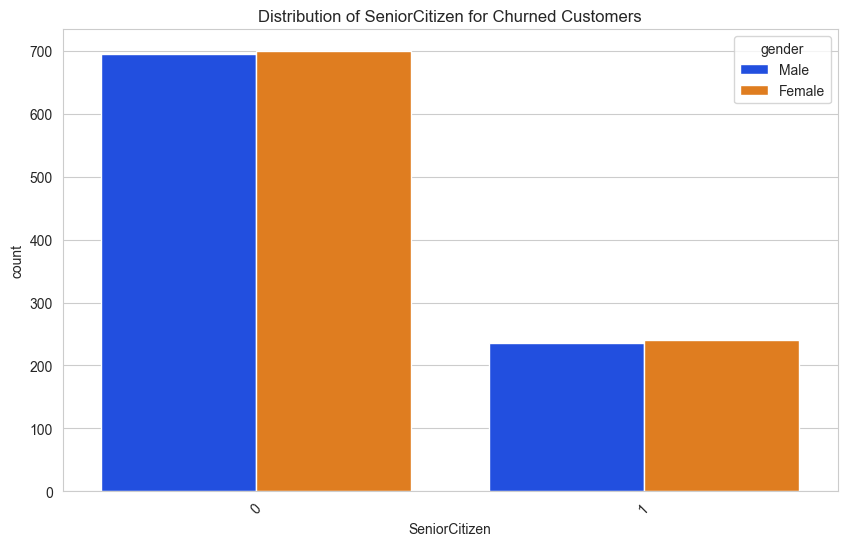

In [144]:
uniplot(new_df1_target1,col='SeniorCitizen',title='Distribution of SeniorCitizen for Churned Customers',hue='gender')

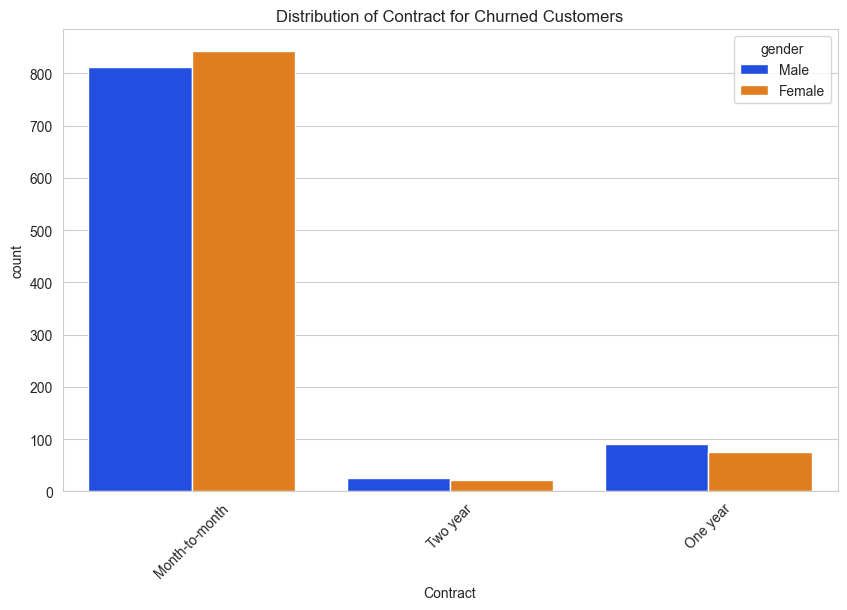

In [142]:
uniplot(new_df1_target1,col='Contract',title='Distribution of Contract for Churned Customers',hue='gender')

In [131]:
# Step 1: Detect target automatically and prepare X, y
df_enc = new_df_dummies.copy()

# find columns that contain "churn" (case-insensitive)
target_candidates = [c for c in df_enc.columns if 'churn' in c.lower()]
if len(target_candidates) == 0:
    raise ValueError("No column containing 'churn' found in new_df_dummies. Check column names.")
    
# prefer 'Churn_Yes' if present, otherwise take the first candidate
if 'Churn_Yes' in df_enc.columns:
    target_col = 'Churn_Yes'
else:
    target_col = target_candidates[0]

print("Using target column:", target_col)

# Ensure target is numeric (0/1)
df_enc[target_col] = df_enc[target_col].astype(int)

X = df_enc.drop(columns=[target_col])
y = df_enc[target_col]

print("X shape:", X.shape, "y distribution:\n", y.value_counts(normalize=True).round(3))


Using target column: Churn_Yes
X shape: (7032, 52) y distribution:
 Churn_Yes
0    0.734
1    0.266
Name: proportion, dtype: float64


In [119]:
# Step 2: Train-test split
RANDOM_STATE = 42
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=RANDOM_STATE, stratify=y
)

print("Train:", X_train.shape, "Test:", X_test.shape)
print("Train churn ratio:", round(y_train.mean(),4), "Test churn ratio:", round(y_test.mean(),4))


Train: (5625, 52) Test: (1407, 52)
Train churn ratio: 0.2658 Test churn ratio: 0.2658


In [120]:
# Step 3: Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Keep as DataFrame if you prefer labeled columns
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled_df  = pd.DataFrame(X_test_scaled,  columns=X_test.columns,  index=X_test.index)

print("Scaling complete. Example (first 3 cols):")
display(X_train_scaled_df.iloc[:, :3].head())


Scaling complete. Example (first 3 cols):


,SeniorCitizen,MonthlyCharges,TotalCharges
1413,-0.439319,0.978740,1.659778
7003,-0.439319,-0.980943,-0.562267
3355,-0.439319,0.845881,1.756025
4494,-0.439319,0.646591,-0.908142
3541,-0.439319,-0.814868,-0.101685


In [121]:
# Step 4: Check class balance
counts = y_train.value_counts()
print("Train counts:\n", counts)
imbalance_ratio = counts.max() / counts.min() if counts.min() > 0 else np.inf
print("Imbalance ratio (major/minor):", round(imbalance_ratio, 2))

# If you want to use SMOTE later:
try:
    from imblearn.over_sampling import SMOTE
    print("imblearn available - you can use SMOTE if needed")
except Exception:
    print("imblearn not installed. To use SMOTE: pip install imbalanced-learn")


Train counts:
 Churn_Yes
0    4130
1    1495
Name: count, dtype: int64
Imbalance ratio (major/minor): 2.76
imblearn not installed. To use SMOTE: pip install imbalanced-learn


In [122]:
# Step 5: Train models
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix

models = {
    'LogisticRegression': LogisticRegression(max_iter=1000, random_state=RANDOM_STATE, class_weight='balanced'),
    'RandomForest': RandomForestClassifier(n_estimators=200, random_state=RANDOM_STATE, class_weight='balanced'),
}

# Add XGBoost only if available
if 'XGBClassifier' in globals():
    models['XGBoost'] = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=RANDOM_STATE)

trained_models = {}
eval_results = {}

from sklearn.metrics import precision_recall_fscore_support

for name, model in models.items():
    print(f"\nTraining: {name}")
    if name == 'LogisticRegression':
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        y_proba = model.predict_proba(X_test_scaled)[:, 1]
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_proba = model.predict_proba(X_test)[:, 1]
    
    acc = accuracy_score(y_test, y_pred)
    roc = roc_auc_score(y_test, y_proba)
    cr = classification_report(y_test, y_pred, digits=4)
    
    trained_models[name] = model
    eval_results[name] = {'accuracy': acc, 'roc_auc': roc, 'report': cr, 'y_pred': y_pred, 'y_proba': y_proba}
    
    print("Accuracy:", round(acc,4), "ROC-AUC:", round(roc,4))
    print("Classification Report:\n", cr)



Training: LogisticRegression
Accuracy: 1.0 ROC-AUC: 1.0
Classification Report:
               precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000      1033
           1     1.0000    1.0000    1.0000       374

    accuracy                         1.0000      1407
   macro avg     1.0000    1.0000    1.0000      1407
weighted avg     1.0000    1.0000    1.0000      1407


Training: RandomForest
Accuracy: 1.0 ROC-AUC: 1.0
Classification Report:
               precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000      1033
           1     1.0000    1.0000    1.0000       374

    accuracy                         1.0000      1407
   macro avg     1.0000    1.0000    1.0000      1407
weighted avg     1.0000    1.0000    1.0000      1407


Training: XGBoost
Accuracy: 1.0 ROC-AUC: 1.0
Classification Report:
               precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000      1033
           

C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [09:49:13] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [123]:

# Step 6: Summary table
summary_df = pd.DataFrame({m: {'accuracy': eval_results[m]['accuracy'], 'roc_auc': eval_results[m]['roc_auc']} for m in eval_results}).T
display(summary_df.sort_values('roc_auc', ascending=False))

# Plot ROC curves
plt.figure(figsize=(8,6))
for name, r in eval_results.items():
    fpr, tpr, _ = roc_curve(y_test, r['y_proba'])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.3f})")

plt.plot([0,1], [0,1], 'k--', alpha=0.4)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves")
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


,accuracy,roc_auc
LogisticRegression,1.0,1.0
RandomForest,1.0,1.0
XGBoost,1.0,1.0


NameError: name 'auc' is not defined

<Figure size 800x600 with 0 Axes>

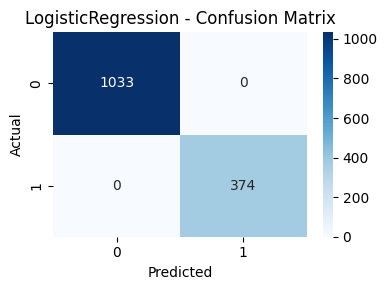

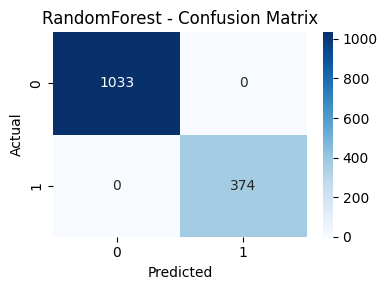

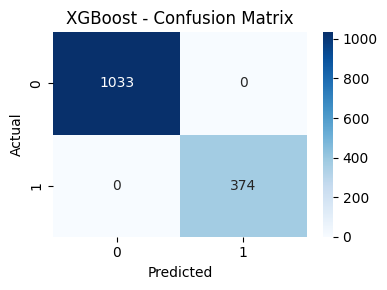

In [124]:
# Step 7: Confusion matrices
for name, r in eval_results.items():
    cm = confusion_matrix(y_test, r['y_pred'])
    plt.figure(figsize=(4,3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{name} - Confusion Matrix")
    plt.ylabel("Actual")
    plt.xlabel("Predicted")
    plt.tight_layout()
    plt.show()


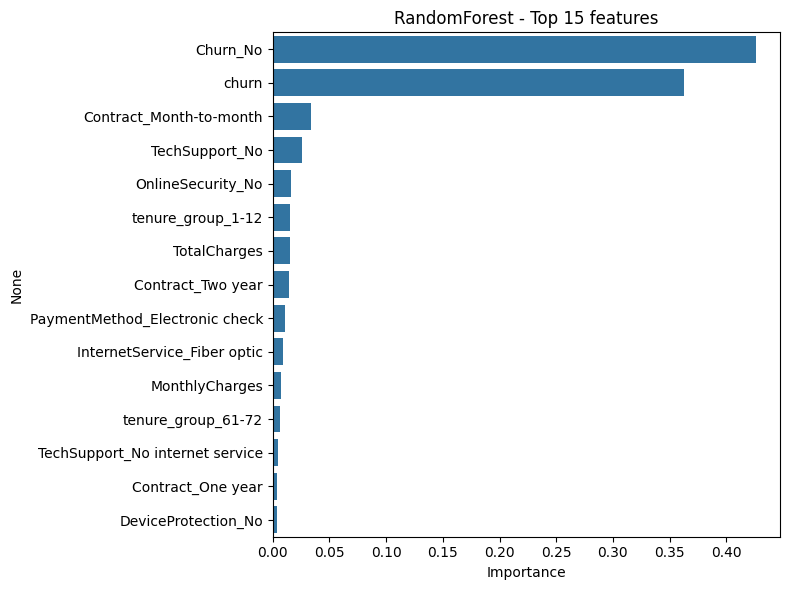

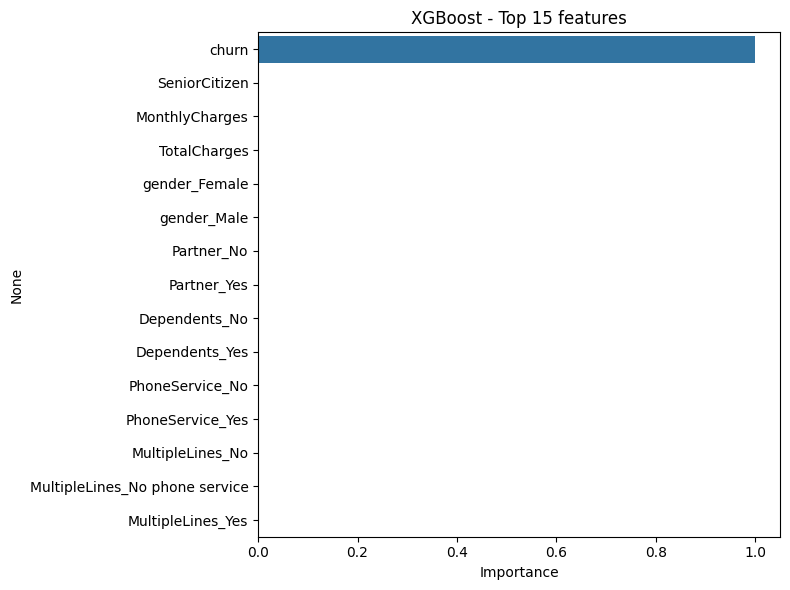

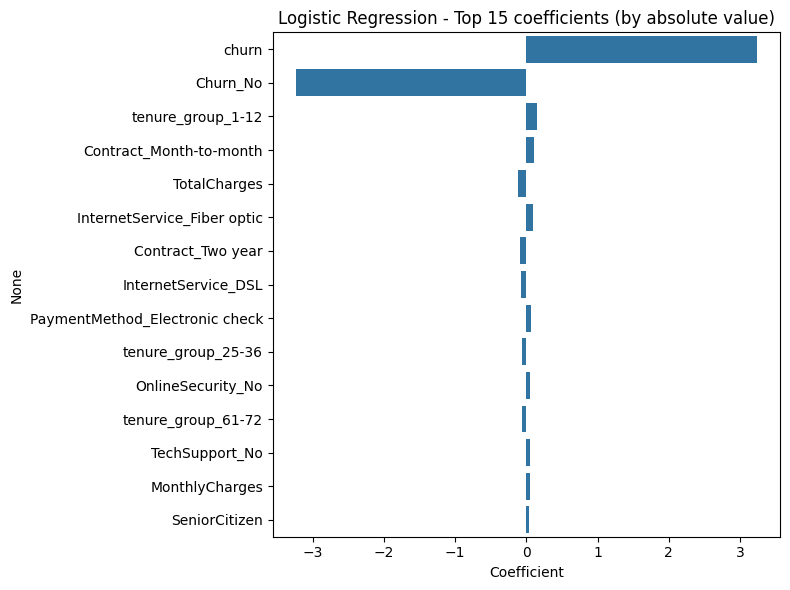

In [125]:
# Step 8: Feature importance

# 1) RandomForest importance
if 'RandomForest' in trained_models:
    rf = trained_models['RandomForest']
    rf_imp = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
    plt.figure(figsize=(8,6))
    sns.barplot(x=rf_imp.head(15).values, y=rf_imp.head(15).index)
    plt.title("RandomForest - Top 15 features")
    plt.xlabel("Importance")
    plt.tight_layout()
    plt.show()

# 2) XGBoost importance (if available)
if 'XGBoost' in trained_models:
    xgb = trained_models['XGBoost']
    xgb_imp = pd.Series(xgb.feature_importances_, index=X.columns).sort_values(ascending=False)
    plt.figure(figsize=(8,6))
    sns.barplot(x=xgb_imp.head(15).values, y=xgb_imp.head(15).index)
    plt.title("XGBoost - Top 15 features")
    plt.xlabel("Importance")
    plt.tight_layout()
    plt.show()

# 3) Logistic Regression coefficients
if 'LogisticRegression' in trained_models:
    lr = trained_models['LogisticRegression']
    coef = pd.Series(lr.coef_[0], index=X.columns).sort_values(key=lambda s: s.abs(), ascending=False)
    plt.figure(figsize=(8,6))
    sns.barplot(x=coef.head(15).values, y=coef.head(15).index)
    plt.title("Logistic Regression - Top 15 coefficients (by absolute value)")
    plt.xlabel("Coefficient")
    plt.tight_layout()
    plt.show()


In [126]:
# Step 9: Choose best model by roc_auc and save
best_model_name = max(eval_results.keys(), key=lambda k: eval_results[k]['roc_auc'])
best_model = trained_models[best_model_name]
print("Best model: ", best_model_name, "ROC-AUC: ", eval_results[best_model_name]['roc_auc'])

# Save model and scaler
import pickle # Add this line
pickle.dump(best_model, open('best_churn_model.pkl', 'wb'))
pickle.dump(scaler, open('scaler.pkl', 'wb'))
print("Saved best_churn_model.pkl and scaler.pkl")


Best model:  LogisticRegression ROC-AUC:  1.0
Saved best_churn_model.pkl and scaler.pkl


In [127]:
# Step 10: Example prediction on one sample from X_test
sample = X_test.iloc[[0]]  # keep as DataFrame
print("Sample index:", sample.index[0])
display(sample.head())

# prepare sample for prediction depending on model type
if best_model_name == 'LogisticRegression':
    sample_prepared = scaler.transform(sample)
else:
    sample_prepared = sample.values

prob = best_model.predict_proba(sample_prepared)[:, 1][0]
pred = (prob >= 0.5).astype(int)

print(f"Predicted churn probability: {prob:.4f} -> Predicted label: {pred} (1 = churn)")


Sample index: 974


,SeniorCitizen,MonthlyCharges,TotalCharges,churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,tenure_group_1-12,tenure_group_13-24,tenure_group_25-36,tenure_group_37-48,tenure_group_49-60,tenure_group_61-72
974,0,75,4542,0,1,0,0,1,0,1,...,1,0,0,1,0,0,0,0,1,0


Predicted churn probability: 0.0003 -> Predicted label: 0 (1 = churn)
